In [1]:
!pip install kaggle

In [4]:
# configuring kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 97% 158M/163M [00:01<00:00, 155MB/s]
100% 163M/163M [00:01<00:00, 134MB/s]


In [6]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [9]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2418.jpg', 'with_mask_3183.jpg', 'with_mask_1147.jpg', 'with_mask_2920.jpg', 'with_mask_3506.jpg']
['with_mask_2833.jpg', 'with_mask_243.jpg', 'with_mask_3259.jpg', 'with_mask_3608.jpg', 'with_mask_838.jpg']


In [10]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3659.jpg', 'without_mask_481.jpg', 'without_mask_2374.jpg', 'without_mask_547.jpg', 'without_mask_3579.jpg']
['without_mask_3769.jpg', 'without_mask_3229.jpg', 'without_mask_1348.jpg', 'without_mask_2038.jpg', 'without_mask_755.jpg']


In [11]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [12]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [13]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [14]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [15]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


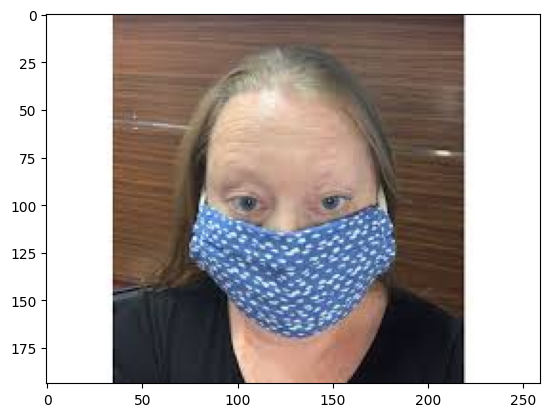

In [17]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_2418.jpg')
imgplot = plt.imshow(img)
plt.show()

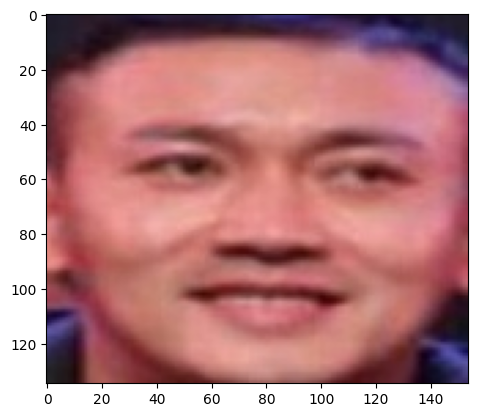

In [18]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_481.jpg')
imgplot = plt.imshow(img)
plt.show()

In [19]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [20]:
type(data)

list

In [21]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
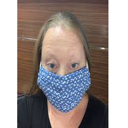

In [22]:
data[0]

In [23]:
type(data[0])

numpy.ndarray

In [24]:
data[0].shape

(128, 128, 3)

In [25]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [26]:
type(X)

numpy.ndarray

In [27]:
type(Y)

numpy.ndarray

In [28]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [29]:
# splliting the data into train test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [31]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 13,  13,  21],
        [ 13,  13,  21],
        [ 13,  13,  21],
        ...,
        [ 83,  71,  59],
        [ 73,  62,  50],
        [ 67,  57,  45]],

       [[ 14,  14,  22],
        [ 14,  14,  22],
        [ 15,  15,  23],
        ...,
        [ 96,  82,  69],
        [ 87,  74,  62],
        [ 82,  70,  58]],

       [[ 14,  13,  20],
        [ 15,  14,  20],
        [ 16,  15,  21],
        ...,
        [108,  91,  79],
        [100,  83,  71],
        [ 96,  79,  67]],

       ...,

       [[117, 118, 104],
        [126, 127, 112],
        [133, 131, 116],
        ...,
        [ 67,  74,  67],
        [ 70,  77,  70],
        [ 71,  78,  71]],

       [[117, 118, 104],
        [126, 126, 111],
        [133, 131, 116],
        ...,
        [ 67,  74,  67],
        [ 70,  77,  70],
        [ 71,  78,  71]],

       [[120, 118, 105],
        [128, 126, 112],
        [134, 131, 116],
        ...,
        [ 67,  74,  67],
        [ 70,  77,  70],
        [ 71,  78,  71]]], dtype=uint8)
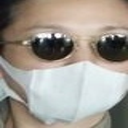

In [32]:
X_train[0]

In [33]:
X_train_scaled[0]

array([[[0.05098039, 0.05098039, 0.08235294],
        [0.05098039, 0.05098039, 0.08235294],
        [0.05098039, 0.05098039, 0.08235294],
        ...,
        [0.3254902 , 0.27843137, 0.23137255],
        [0.28627451, 0.24313725, 0.19607843],
        [0.2627451 , 0.22352941, 0.17647059]],

       [[0.05490196, 0.05490196, 0.08627451],
        [0.05490196, 0.05490196, 0.08627451],
        [0.05882353, 0.05882353, 0.09019608],
        ...,
        [0.37647059, 0.32156863, 0.27058824],
        [0.34117647, 0.29019608, 0.24313725],
        [0.32156863, 0.2745098 , 0.22745098]],

       [[0.05490196, 0.05098039, 0.07843137],
        [0.05882353, 0.05490196, 0.07843137],
        [0.0627451 , 0.05882353, 0.08235294],
        ...,
        [0.42352941, 0.35686275, 0.30980392],
        [0.39215686, 0.3254902 , 0.27843137],
        [0.37647059, 0.30980392, 0.2627451 ]],

       ...,

       [[0.45882353, 0.4627451 , 0.40784314],
        [0.49411765, 0.49803922, 0.43921569],
        [0.52156863, 0

In [34]:
# importing the dependancies
import tensorflow as tf
from tensorflow import keras

In [35]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [36]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [37]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 10s 27ms/step - loss: 0.5455 - acc: 0.7567 - val_loss: 0.2874 - val_acc: 0.8777
Epoch 2/5
170/170 [==============================] - 3s 20ms/step - loss: 0.2999 - acc: 0.8747 - val_loss: 0.3098 - val_acc: 0.8645
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2678 - acc: 0.8950 - val_loss: 0.2144 - val_acc: 0.8959
Epoch 4/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2127 - acc: 0.9211 - val_loss: 0.2251 - val_acc: 0.8992
Epoch 5/5
170/170 [==============================] - 3s 19ms/step - loss: 0.1788 - acc: 0.9305 - val_loss: 0.2407 - val_acc: 0.8843


In [38]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 11ms/step - loss: 0.1991 - acc: 0.9126
Test Accuracy = 0.9126406311988831


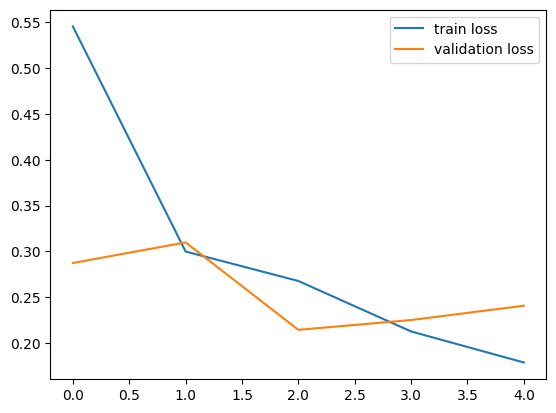

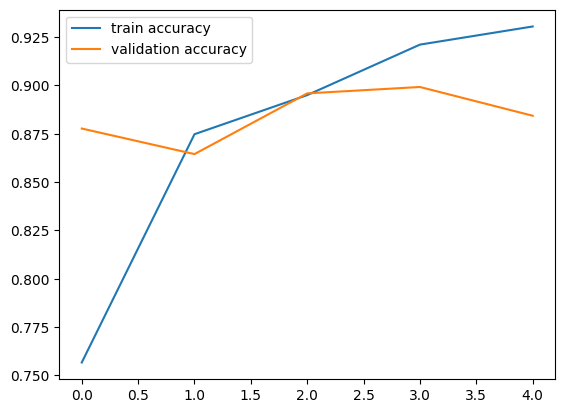

In [39]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/IMG_7727.JPG


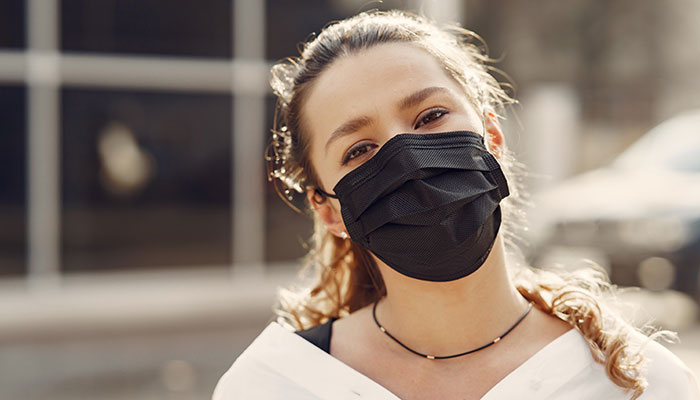

1/1 [==============================] - 0s 35ms/step
[[0.15857725 0.7082543 ]]
1
The person in the image is wearing a mask


In [43]:
# predictive system
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/IMG_7726.PNG


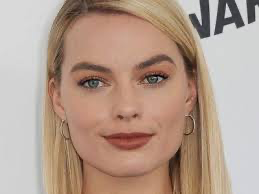

1/1 [==============================] - 0s 19ms/step
[[0.01819647 0.89325863]]
1
The person in the image is wearing a mask


In [44]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')